In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
#source: https://stats.stackexchange.com/questions/72774/numerical-example-to-understand-expectation-maximization

## E-M Coin Toss Example as given in the EM tutorial paper by Do and Batzoglou* ##

def get_binomial_log_likelihood(obs,probs):
    """ Return the (log)likelihood of obs, given the probs"""
    # Binomial Distribution Log PDF
    # ln (pdf)      = Binomial Coeff * product of probabilities
    # ln[f(x|n, p)] =   comb(N,k)    * num_heads*ln(pH) + (N-num_heads) * ln(1-pH)

    N = sum(obs);#number of trials  
    k = obs[0] # number of heads
    binomial_coeff = math.factorial(N) / (math.factorial(N-k) * math.factorial(k))
    prod_probs = obs[0]*math.log(probs[0]) + obs[1]*math.log(1-probs[0])
    log_lik = binomial_coeff + prod_probs

    return log_lik

C:\Users\risto\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\risto\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\risto\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# 1st:  Coin B, {HTTTHHTHTH}, 5H,5T
# 2nd:  Coin A, {HHHHTHHHHH}, 9H,1T
# 3rd:  Coin A, {HTHHHHHTHH}, 8H,2T
# 4th:  Coin B, {HTHTTTHHTT}, 4H,6T
# 5th:  Coin A, {THHHTHHHTH}, 7H,3T
# so, from MLE: pA(heads) = 0.80 and pB(heads)=0.45

# represent the experiments
head_counts = np.array([5,9,8,4,7])
tail_counts = 10-head_counts
experiments = list(zip(head_counts,tail_counts))

# initialise the pA(heads) and pB(heads)
pA_heads = np.zeros(100); pA_heads[0] = 0.60
pB_heads = np.zeros(100); pB_heads[0] = 0.50

In [3]:
# E-M begins!
delta = 0.001  
j = 0 # iteration counter
improvement = float('inf')
while (improvement>delta):
    expectation_A = np.zeros((len(experiments),2), dtype=float) 
    expectation_B = np.zeros((len(experiments),2), dtype=float)
    for i in range(0,len(experiments)):
        e = experiments[i] # i'th experiment
          # loglikelihood of e given coin A:
        ll_A = get_binomial_log_likelihood(e,np.array([pA_heads[j],1-pA_heads[j]])) 
          # loglikelihood of e given coin B
        ll_B = get_binomial_log_likelihood(e,np.array([pB_heads[j],1-pB_heads[j]])) 

          # corresponding weight of A proportional to likelihood of A 
        weightA = math.exp(ll_A) / ( math.exp(ll_A) + math.exp(ll_B) ) 

          # corresponding weight of B proportional to likelihood of B
        weightB = math.exp(ll_B) / ( math.exp(ll_A) + math.exp(ll_B) ) 

        expectation_A[i] = np.dot(weightA, e) 
        expectation_B[i] = np.dot(weightB, e)

    pA_heads[j+1] = sum(expectation_A)[0] / sum(sum(expectation_A)); 
    pB_heads[j+1] = sum(expectation_B)[0] / sum(sum(expectation_B)); 

    improvement = ( max( abs(np.array([pA_heads[j+1],pB_heads[j+1]]) - 
                    np.array([pA_heads[j],pB_heads[j]]) )) )
    j = j+1

In [4]:
e

(7, 3)

In [5]:
weightA

0.6007431692033663

In [10]:
e

(7, 3)

In [14]:
7*weightA#+3*weightA

4.205202184423564

In [12]:
5*weightA

3.003715846016832

In [13]:
 np.dot(weightA, e) 

array([4.20520218, 1.80222951])

In [8]:
 np.dot(weightB, e) 

array([2.79479782, 1.19777049])

In [15]:
 np.dot(weightA, e) +  np.dot(weightB, e) 

array([7., 3.])

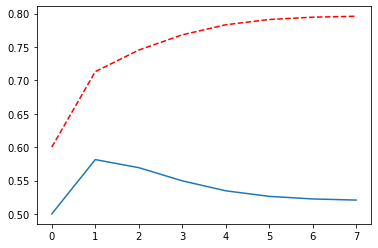

In [9]:
plt.figure();
plt.plot(range(0,j),pA_heads[0:j], 'r--')
plt.plot(range(0,j),pB_heads[0:j])
plt.show()